In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn.datasets
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


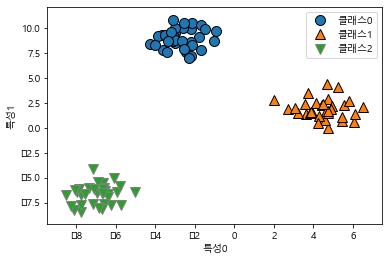

In [68]:
#다중클래스분류
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(["클래스0","클래스1","클래스2"])

In [69]:
#멀티 클래스 default 값은 auto라 multinomial로 계산
logr = LogisticRegression().fit(X,y)
print("계수 배열의 크기: ",logr.coef_.shape)
print("절편 배열의 크기: ",logr.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


계수 배열:
 [[-0.38486163  0.62874226]
 [ 0.74106233 -0.17664082]
 [-0.3562007  -0.45210144]]


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


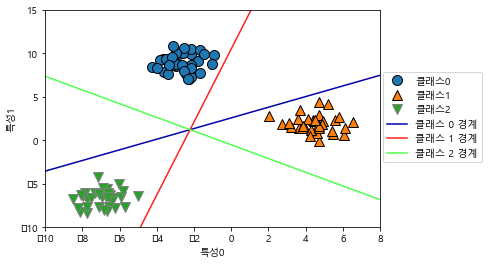

In [70]:
#멀티클래스
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(['클래스0', '클래스1', '클래스2','클래스 0 경계', '클래스 1 경계', 
           '클래스 2 경계'], loc=(1.01,0.3))
print("계수 배열:\n",logr.coef_)

In [71]:
#이진클래스
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기:",linear_svm.coef_.shape)
print("절편 배열의 크기:",linear_svm.intercept_.shape)

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


계수 배열:
 [[-0.17492203  0.23140377]
 [ 0.47621322 -0.06937671]
 [-0.18914312 -0.20399604]]


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


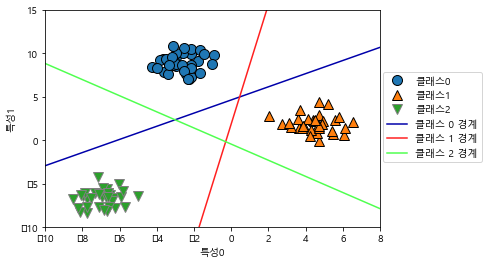

In [73]:
#이진클래스
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(['클래스0', '클래스1', '클래스2','클래스 0 경계', '클래스 1 경계', 
           '클래스 2 경계'], loc=(1.01,0.3))
print("계수 배열:\n",linear_svm.coef_)

Text(0, 0.5, '특성1')

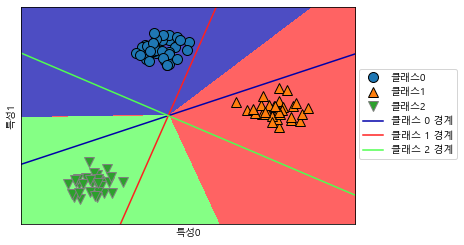

In [5]:
#멀티클래스
mglearn.plots.plot_2d_classification(logr,X,fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.legend(['클래스0','클래스1','클래스2','클래스 0 경계','클래스 1 경계',
           '클래스 2 경계'], loc=(1.01,0.3))
plt.xlabel("특성0")
plt.ylabel("특성1")

Text(0, 0.5, '특성1')

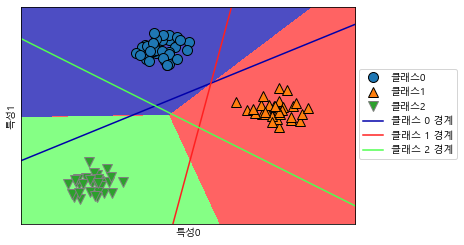

In [74]:
#이진 클래스
mglearn.plots.plot_2d_classification(logr,X,fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.legend(['클래스0','클래스1','클래스2','클래스 0 경계','클래스 1 경계',
           '클래스 2 경계'], loc=(1.01,0.3))
plt.xlabel("특성0")
plt.ylabel("특성1")

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
iris_dataset = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],
                                                random_state=0,test_size=0.40)
logr = LogisticRegression().fit(X,y)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

print('\n테스트 세트의 정확도: {:.2f}'.format(logr.score(X_test,y_test)))
print("Number of mislabeled points out of a total %d points : %d", 
     (X_test.shape[0],(y_test != y_pred).sum()))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]

테스트 세트의 정확도: 0.92
Number of mislabeled points out of a total %d points : %d (60, 5)


In [80]:
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],
                                                random_state=0,test_size=0.40)
linear_svm = LinearSVC().fit(X,y)
linear_svm.fit(X_train,y_train)
y_pred = linear_svm.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

print('\n테스트 세트의 정확도: {:.2f}'.format(linear_svm.score(X_test,y_test)))
print("Number of mislabeled points out of a total %d points : %d", 
     (X_test.shape[0],(y_test != y_pred).sum()))

[[16  0  0]
 [ 0 20  3]
 [ 0  2 19]]

테스트 세트의 정확도: 0.92
Number of mislabeled points out of a total %d points : %d (60, 5)


D:\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [85]:
#클래스를 다르게하자 일부 예측값이 달라지는 것을 확인할 수 있다.
print("predict:\n",logr.predict(X_test[:30]))
print("predict:\n",linear_svm.predict(X_test[:30]))
print("probability:\n", logr.predict_proba(X_test[:30]))

predict:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
predict:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 2 0 0 2 0 0 1 1 0]
probability:
 [[3.31268601e-04 1.22812776e-01 8.76855956e-01]
 [1.49073644e-02 9.68438212e-01 1.66544231e-02]
 [9.87117165e-01 1.28825422e-02 2.92956823e-07]
 [3.90825453e-06 4.07650439e-02 9.59231048e-01]
 [9.70874162e-01 2.91252309e-02 6.06746507e-07]
 [6.11405895e-06 1.15477258e-02 9.88446160e-01]
 [9.82263653e-01 1.77360428e-02 3.04444913e-07]
 [4.18438932e-03 7.27172735e-01 2.68642875e-01]
 [2.31528217e-03 7.61349540e-01 2.36335178e-01]
 [2.61148366e-02 9.31808632e-01 4.20765314e-02]
 [2.53911895e-04 3.18880003e-01 6.80866085e-01]
 [9.79354720e-03 7.84459214e-01 2.05747239e-01]
 [5.77051290e-03 8.37816953e-01 1.56412534e-01]
 [4.45378289e-03 7.90211051e-01 2.05335166e-01]
 [5.61604114e-03 7.61348218e-01 2.33035741e-01]
 [9.83304175e-01 1.66955730e-02 2.52473562e-07]
 [9.29207717e-03 7.96124175e-01 1.94583748e-01]
 [1.42542636e-02 8.9985469

In [8]:
#가우시안 나이브 베이즈 분류기
from sklearn.naive_bayes import GaussianNB

#test size = 0.40
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ",accuracy)
#print("테스트 세트의 정확도 :{.2f}".format(classifier.score(X_test,y_test)))
#print("테스트 세트의 정확도 :{.2f}".format(np.mean(y_pred == y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test !=y_pred).sum()))

Accuracy:  0.9333333333333333
Number of mislabeled points out of a total %d points : %d (60, 4)


In [9]:
#test size = 0.35
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],
                                                random_state=0,test_size=0.35)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ",accuracy)
#print("테스트 세트의 정확도 :{.2f}".format(classifier.score(X_test,y_test)))
#print("테스트 세트의 정확도 :{.2f}".format(np.mean(y_pred == y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test !=y_pred).sum()))

#test size = 0.30
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],
                                                random_state=0,test_size=0.30)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ",accuracy)
#print("테스트 세트의 정확도 :{.2f}".format(classifier.score(X_test,y_test)))
#print("테스트 세트의 정확도 :{.2f}".format(np.mean(y_pred == y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test !=y_pred).sum()))

Accuracy:  0.9622641509433962
Number of mislabeled points out of a total %d points : %d (53, 2)
Accuracy:  1.0
Number of mislabeled points out of a total %d points : %d (45, 0)


In [11]:
#cancer data

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target, stratify=cancer.target,
                                                random_state=42)

#가우시안으로 테스트
classifierGN = GaussianNB().fit(X_train,y_train)
print("테스트 세트의 정확도 :{:.3f}".format(classifierGN.score(X_train,y_train)))
print("테스트 세트의 정확도 :{:.3f}".format(classifierGN.score(X_test,y_test)),'\n')

#logistic regression 으로 테스트
logr = LogisticRegression(max_iter=10000).fit(X_train,y_train)
print("테스트 세트의 정확도 :{:.3f}".format(logr.score(X_train,y_train)))
print("테스트 세트의 정확도 :{:.3f}".format(logr.score(X_test,y_test)))


테스트 세트의 정확도 :0.946
테스트 세트의 정확도 :0.937 

테스트 세트의 정확도 :0.958
테스트 세트의 정확도 :0.958


In [32]:
#결정트리의 기본세팅
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

#default tree 깊이제한 X
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트의 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트의 정확도: {:.3f}".format(tree.score(X_test,y_test)),'\n')

#tree 깊이 4로 제한
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트의 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트의 정확도: {:.3f}".format(tree.score(X_test,y_test)))

훈련 세트의 정확도: 1.000
테스트 세트의 정확도: 0.840 

훈련 세트의 정확도: 0.933
테스트 세트의 정확도: 0.800


In [26]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,
                                                stratify=cancer.target, random_state=42)
print("X_trian.shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))

for max_depth in [1,4,8]:
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    tree.fit(X_train,y_train)
    print("max_depth = {}".format(max_depth))
    print("훈련 세트의 정확도 : {:.3f}".format(tree.score(X_train,y_train)))
    print("테스트 세트의 정확도 : {:.3f}".format(tree.score(X_test,y_test)))

X_trian.shape: (426, 30) X_test.shape: (143, 30)
max_depth = 1
훈련 세트의 정확도 : 0.923
테스트 세트의 정확도 : 0.923
max_depth = 4
훈련 세트의 정확도 : 0.988
테스트 세트의 정확도 : 0.951
max_depth = 8
훈련 세트의 정확도 : 1.000
테스트 세트의 정확도 : 0.937


In [27]:
#트리에서 특성의 중요도를 표시
print("특성 중요도: \n{}".format(tree.feature_importances_))

특성 중요도: 
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


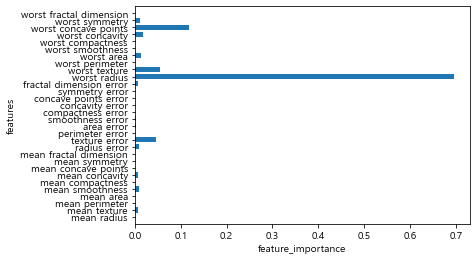

In [28]:
#각특성의 중요도를 그래프로 표시
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature_importance')
    plt.ylabel('features')
    plt.ylim(-1,n_features)
    
plot_feature_importances_cancer(tree)

In [93]:
#graphviz 오류 아직 해결하지못했습니다. 계속 시도해보는 중입니다 .죄송합니다.
X1,y1 = make_blobs(centers=4, random_state=8)
y= y%2
tree = DecisionTreeClassifier(random_state=0).fit(X1,y1)

tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

ModuleNotFoundError: No module named 'graphviz'

ram_prices.shape:(333, 3)
ram_prices.keys:Index(['Unnamed: 0', 'date', 'price'], dtype='object')
   Unnamed: 0    date        price
0           0  1957.0  411041792.0
1           1  1959.0   67947725.0
2           2  1960.0    5242880.0
3           3  1965.0    2642412.0
4           4  1970.0     734003.0


Text(0, 0.5, '가격($/byte)')

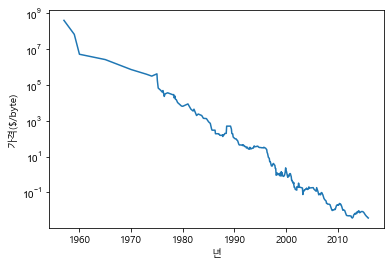

In [43]:
import os 
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'ram_price.csv'))

print("ram_prices.shape:{}".format(ram_prices.shape))
print("ram_prices.keys:{}".format(ram_prices.keys()))
print("{}".format(ram_prices[:5]))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격($/byte)")

In [45]:
from sklearn.tree import DecisionTreeRegressor
#2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]

print('data_train.shape:{}'.format(data_train.shape), 'data_test.shape:{}'.format(data_test.shape))

#가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date[:,np.newaxis]
#데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꾼다..
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

#예측은 전체 기간에 대해서 수행
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#예측한 값의 로그 스케일을 되돌린다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

data_train.shape:(202, 3) data_test.shape:(131, 3)


<ipython-input-45-437bf5f31fbf>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:,np.newaxis]
<ipython-input-45-437bf5f31fbf>:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


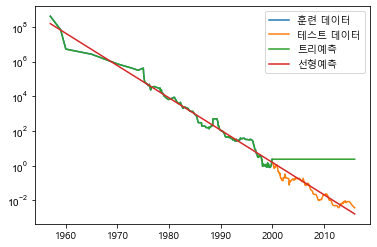

In [47]:
#결정트리는 훈련데이터를 넘어서는 마지막에 예측이 안되서 시계열 데이터에는 잘맞지 않는다.
plt.yticks(fontname="Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price ,label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리예측")
plt.semilogy(ram_prices.date, price_lr ,label="선형예측")
plt.legend()

In [14]:
#랜덤포레스트 이용
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X,y = make_moons(n_samples = 100, noise=0.25, random_state = 3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y, random_state=42)

forest = RandomForestClassifier(n_estimators = 5, random_state =2)
forest.fit(X_train,y_train)
print("테스트 세트의 정확도:{:.3f}\n".format(forest.score(X_test,y_test)))

cvscores = cross_val_score(forest,X,y , cv=5)
print("테스트 세트의 정확도 C5V=5: {:.3f}\n".format(cvscores.mean() ))

cvscores = cross_val_score(forest,X,y,cv=10)
print("테스트 세트의 정확도 CV=10: {:.3f}\n".format(cvscores.mean() ))

테스트 세트의 정확도:0.920

테스트 세트의 정확도 C5V=5: 0.860

테스트 세트의 정확도 CV=10: 0.840



In [12]:
#결정트리와 비교
X,y = make_moons(n_samples =100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y, random_state=42)

dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
dt.fit(X_train,y_train)
print("테스트 세트의 정확도:{:.3f}\n".format(dt.score(X_test,y_test)))

cvscores = cross_val_score(dt,X,y , cv=5)
print("테스트 세트의 정확도 C5V=5: {:.3f}\n".format(cvscores.mean() ))

cvscores = cross_val_score(dt,X,y,cv=10)
print("테스트 세트의 정확도 CV=10: {:.3f}\n".format(cvscores.mean() ))

테스트 세트의 정확도:0.880

테스트 세트의 정확도 C5V=5: 0.860

테스트 세트의 정확도 CV=10: 0.850



D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


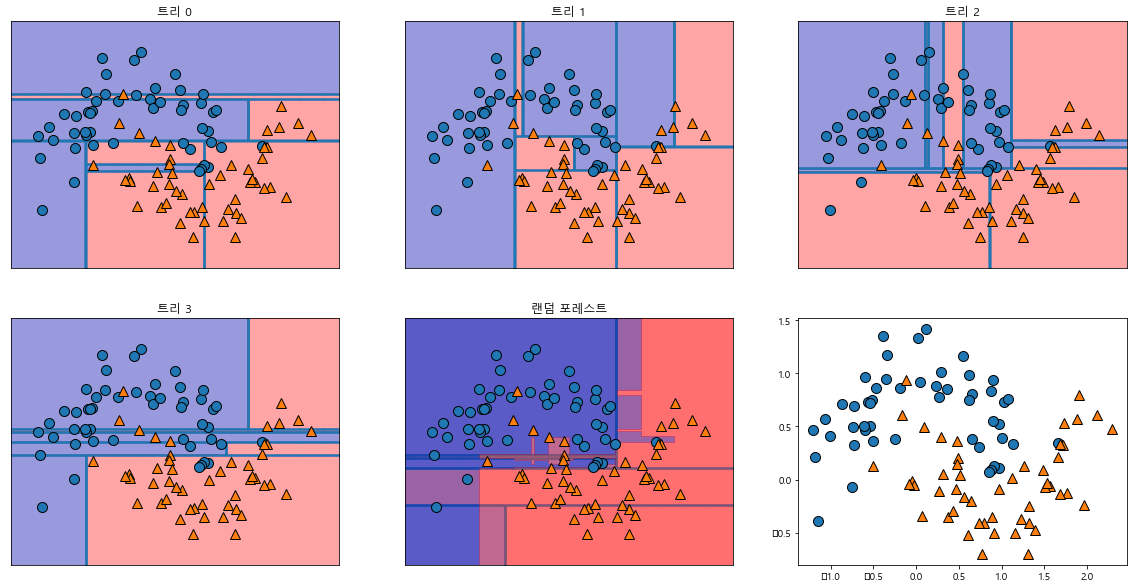

In [16]:
X,y = make_moons(n_samples = 100, noise=0.25, random_state = 3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y, random_state=42)

forest = RandomForestClassifier(n_estimators = 5, random_state =2)
forest.fit(X_train,y_train)
#랜덤 포레스트를 그래프로 표시
fig, axes= plt.subplots(2,3, figsize = (20,10))
for i,( ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,1], alpha=.4)
axes[-1,1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [23]:
#유방암 데이터를 이용해 랜덤포레스트 CV 값을 바꿔가며 테스트
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test,y_train,y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

cvscores = cross_val_score(forest,X,y,cv=5)
print('테스트 세트 정확도 CV=5 : {:.3f}\n'.format(cvscores.mean() ))
print(cvscores)

cvscores = cross_val_score(forest,X,y,cv=10)
print('테스트 세트 정확도 CV=10 : {:.3f}\n'.format(cvscores.mean() ))
print(cvscores)

훈련 세트 정확도: 1.000
테스트 세트 정확도 : 0.972
테스트 세트 정확도 CV=5 : 0.920

[0.95 0.9  1.   0.85 0.9 ]
테스트 세트 정확도 CV=10 : 0.910

[1.  1.  0.8 0.9 1.  1.  0.7 1.  0.9 0.8]


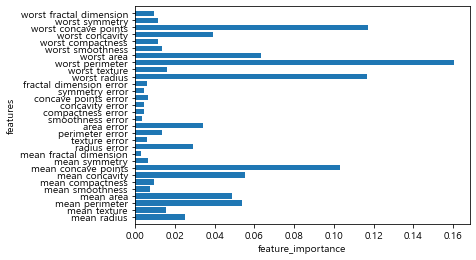

In [29]:
#각 특성의 중요도를 표시
plot_feature_importances_cancer(forest)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target, 
                                                 random_state=0)

#learning rate=0.1, n_estimators=100, max_depth=3  깊이 3인 트리 100개
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train,y_train)

print("훈련 세트의 정확도:{:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트의 정확도:{:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트의 정확도:1.000
테스트 세트의 정확도:0.965


In [36]:
#과적합을 피하기 위해 사전 가지치기를 하여 학습률 조정, CV 값에 따라 정확도가 달라진다.
cvscores = cross_val_score(gbrt,X,y,cv=5)
print('테스트 세트 정확도 CV=5 : {:.3f}\n'.format(cvscores.mean() ))
print(cvscores,'\n')

cvscores = cross_val_score(gbrt,X,y,cv=7)
print('테스트 세트 정확도 CV=7 : {:.3f}\n'.format(cvscores.mean() ))
print(cvscores,'\n')

cvscores = cross_val_score(gbrt,X,y,cv=10)
print('테스트 세트 정확도 CV=10 : {:.3f}\n'.format(cvscores.mean() ))
print(cvscores)

테스트 세트 정확도 CV=5 : 0.850

[0.95 0.85 0.95 0.75 0.75] 

테스트 세트 정확도 CV=7 : 0.869

[1.         0.86666667 0.85714286 0.92857143 0.78571429 0.85714286
 0.78571429] 

테스트 세트 정확도 CV=10 : 0.890

[1.  0.9 0.9 0.9 0.9 1.  0.8 1.  0.8 0.7]


In [39]:
#트리 최대깊이를 조정, 과적합을 피하고 테스트 데이터의 상향을 목적으로 한다.
gbrt = GradientBoostingClassifier(random_state = 0,max_depth=1)
gbrt.fit(X_train,y_train)

print("훈련 세트의 정확도:{:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트의 정확도:{:.3f}".format(gbrt.score(X_test,y_test)))

cvscores = cross_val_score(gbrt,X,y,cv=5)
print('테스트 세트 정확도 CV=5 : {:.3f}\n'.format(cvscores.mean() ))
cvscores = cross_val_score(gbrt,X,y,cv=10)
print('테스트 세트 정확도 CV=10 : {:.3f}\n'.format(cvscores.mean() ))

gbrt = GradientBoostingClassifier(random_state = 0,max_depth=2)
gbrt.fit(X_train,y_train)
print("훈련 세트의 정확도:{:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트의 정확도:{:.3f}".format(gbrt.score(X_test,y_test)))

cvscores = cross_val_score(gbrt,X,y,cv=5)
print('테스트 세트 정확도 CV=5 : {:.3f}\n'.format(cvscores.mean() ))
cvscores = cross_val_score(gbrt,X,y,cv=10)
print('테스트 세트 정확도 CV=10 : {:.3f}\n'.format(cvscores.mean() ))

훈련 세트의 정확도:0.991
테스트 세트의 정확도:0.972
테스트 세트 정확도 CV=5 : 0.870

테스트 세트 정확도 CV=10 : 0.890

훈련 세트의 정확도:1.000
테스트 세트의 정확도:0.972
테스트 세트 정확도 CV=5 : 0.880

테스트 세트 정확도 CV=10 : 0.870



In [40]:
#학습률을 낮출수록 정확도는 조금 떨어지지만 과적합을 피할 수 있다.
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate=0.1)
gbrt.fit(X_train,y_train)

print("훈련 세트의 정확도:{:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트의 정확도:{:.3f}".format(gbrt.score(X_test,y_test)))

cvscores = cross_val_score(gbrt,X,y,cv=5)
print('테스트 세트 정확도 CV=5 : {:.3f}\n'.format(cvscores.mean() ))
cvscores = cross_val_score(gbrt,X,y,cv=10)
print('테스트 세트 정확도 CV=10 : {:.3f}\n'.format(cvscores.mean() ))

gbrt = GradientBoostingClassifier(random_state = 0, learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("훈련 세트의 정확도:{:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트의 정확도:{:.3f}".format(gbrt.score(X_test,y_test)))

cvscores = cross_val_score(gbrt,X,y,cv=5)
print('테스트 세트 정확도 CV=5 : {:.3f}\n'.format(cvscores.mean() ))
cvscores = cross_val_score(gbrt,X,y,cv=10)
print('테스트 세트 정확도 CV=10 : {:.3f}\n'.format(cvscores.mean() ))

훈련 세트의 정확도:1.000
테스트 세트의 정확도:0.965
테스트 세트 정확도 CV=5 : 0.850

테스트 세트 정확도 CV=10 : 0.890

훈련 세트의 정확도:0.988
테스트 세트의 정확도:0.965
테스트 세트 정확도 CV=5 : 0.860

테스트 세트 정확도 CV=10 : 0.870



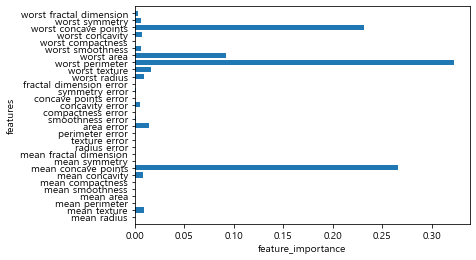

In [44]:
#깊이 제한을 한후 특성중요도 체크, 일부 특성이 무시된 것을 확인할 수 있다.
gbrt = GradientBoostingClassifier(random_state = 0, max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

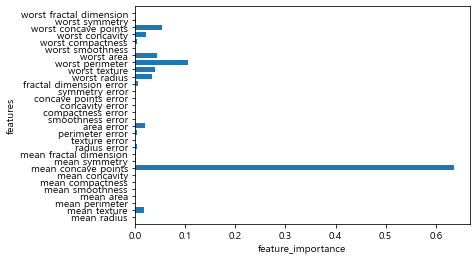

In [45]:
#학습률을 다르게 한 후 특성중요도를 체크해보았다. 위의 그래프와는 또 다른 
#특성이 나온것을 확인 할 수 있엇다.
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate=0.01)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

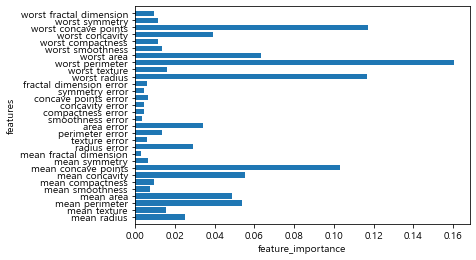

In [46]:
#기존의 랜덤포래스트의 특성중요도 그래프와 비교
plot_feature_importances_cancer(forest)